## Run a pipeline with data on a remote s3 bucket

This process will run the entire pipeline described in a configuration file. The input data is available in a remote s3 bucket.

## Import dependencies

In [14]:
%load_ext autoreload
%autoreload 2
from paidiverpy.pipeline import Pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Working with a public object store (https data)

When working with public object store, you just need to give as input path the paths of the files in the configuration file, as you can see in the example below:

```yaml
general:
  input_path: "https://paidiver-o.s3-ext.jc.rl.ac.uk/paidiverpy/data/lazy_load_benthic/"
  output_path: "output"
  metadata_path: "https://paidiver-o.s3-ext.jc.rl.ac.uk/paidiverpy/data/lazy_load_benthic/metadata_ifdo_hf.json"
```

In this case, I am giving the path on the object store where all my images are storage. For the metadata path, you have to give the exact link of the metadata

In [15]:
pipeline = Pipeline(config_file_path="../config_files/config_object_store.yml")

You can continue, but some functions may not work properly.
Please set verbose to 3 (DEBUG) to see the validation errors.






In [16]:
# See the pipeline steps. Click in a step to see more information about it
pipeline

In [17]:
# Run the pipeline
pipeline.run()

☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:37 | Processing images using 8 cores


INFO:paidiverpy:Processing images using 8 cores


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:37 | Running step 0: raw - OpenLayer


INFO:paidiverpy:Running step 0: raw - OpenLayer


[########################################] | 100% Completed | 3.67 ss
☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:42 | Step 0 completed


INFO:paidiverpy:Step 0 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:42 | Running step 1: colour_correction - ColourLayer


INFO:paidiverpy:Running step 1: colour_correction - ColourLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:42 | Step 1 completed


INFO:paidiverpy:Step 1 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:42 | Running step 2: datetime - SamplingLayer


INFO:paidiverpy:Running step 2: datetime - SamplingLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:42 | Number of images before the sampling step: 3. Total number of images after: 3


INFO:paidiverpy:Number of images before the sampling step: 3. Total number of images after: 3


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:43 | Step 2 completed


INFO:paidiverpy:Step 2 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:43 | Running step 3: colour_correction - ColourLayer


INFO:paidiverpy:Running step 3: colour_correction - ColourLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:43 | Step 3 completed


INFO:paidiverpy:Step 3 completed


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:43 | Running step 4: sharpen - ColourLayer


INFO:paidiverpy:Running step 4: sharpen - ColourLayer


☁ paidiverpy ☁  |       INFO | 2025-09-11 16:52:46 | Step 4 completed


INFO:paidiverpy:Step 4 completed


[########################################] | 100% Completed | 6.07 sms



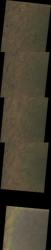
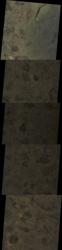
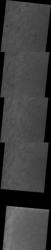
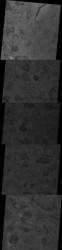
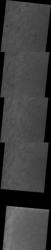
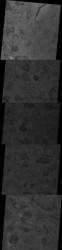
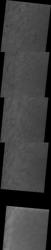
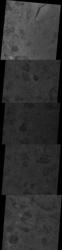
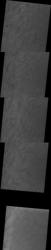
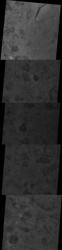

In [18]:
# See the images output
pipeline.images

## Get files with a private object store with credentials

Get files from a private object store. In this case, you need to pass the credentials of the object store as env variables:

```
OS_SECRET=
OS_TOKEN=
OS_ENDPOINT=
```

Normally, in this case, the path starts with "s3://", like  in the example below:

```yaml
general:
  input_path: "s3://paidiverpy/data/lazy_load_benthic/"
  output_path: "s3://paidiverpy/data/lazy_load_benthic/output2/"
  metadata_path: "s3://paidiverpy/data/lazy_load_benthic/metadata_ifdo_hf.json"
```


After providing the correct environment variables, you have to update the configuration file `examples/config_files/config_object_store2.yml` with the correct Object store paths. And then, you can try to run this notebook with the commands below:

```python
pipeline = Pipeline(config_file_path="../config_files/config_object_store2.yml")
pipeline.run()
pipeline.save_images(image_format="png")
```

The images will be saved in the object store
